In [1]:
using StateSpaceDynamics, Plots


In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.96 0.04; 0.04 0.96], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.86383255548

In [3]:
T = 4000
# Generate synthetic data
x, y, z = sample(model, T)


([0.012781148406102944 -0.043551433682513074 … 0.0030036478028334195 -0.054446643169820064; 0.03788281101630884 -0.021698572664429976 … -0.04469927528395449 -0.002751013292864604], [-0.0037362031674817945 0.011184638740456908 … -0.03463349125701533 0.028886027612638268; 0.01979088919057409 0.030620168627788782 … -0.0010348302792899944 0.07478957328520046; … ; -0.06176123606409473 0.086548578688241 … 0.03008595078015174 0.04337883945436263; 0.042094688716242876 -0.10110240825174423 … -0.04235920142871636 -0.014447265678334924], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 2, 2, 2, 2])

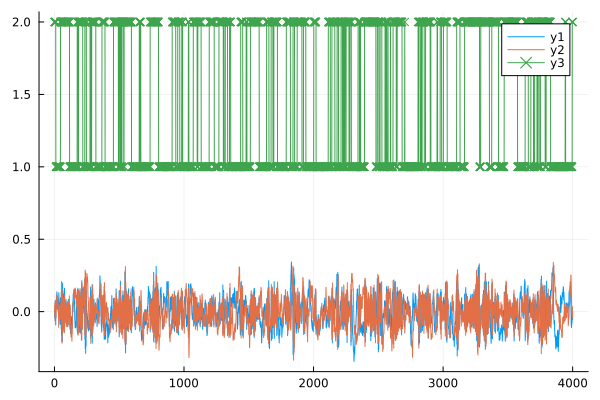

In [4]:
plot(x')
plot!(z, marker=:x)

In [5]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = [0.9 0.1; 0.2 0.8]
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.5 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.5 * I(d))

# set up the observation parameters
#C = randn(p, d)
#R = Matrix(0.001 * I(p))

C = model.B[1].obs_model.C
R = model.B[1].obs_model.R

#B = [StateSpaceDynamics.LinearDynamicalSystem(
#    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
#    StateSpaceDynamics.GaussianObservationModel(C, R),
#    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(model.B[i].state_model.A, model.B[i].state_model.Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

    model.B[1].state_model.A

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.9 0.1; 0.2 0.8], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.5 0.0; 0.0 0.5]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.8638325554843976; 0

In [6]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [7]:
modeli.A

2×2 Matrix{Float64}:
 0.9  0.1
 0.2  0.8

In [19]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=10)

Fitting SLDS via vEM... 100%|██████████████████████████████████████████████████| Time: 0:00:03 ( 0.33  s/it)


([-24553.85401367792, -20671.46678298288, -20649.32114938665, -20646.379781372376, -20645.19143070531, -20645.1592304378, -20644.960767689885, -20644.95395669191, -20644.943843671408, -20644.93423806906], [0.00519730132444627, 0.015350987659701908, 0.005012407086754365, 0.001744687270518367, 0.0007696634912829072, 0.00039196781081182497, 0.0002635627698028853, 0.00020433377399152006, 0.00016796662088218374, 0.0001426380869270178], StateSpaceDynamics.ForwardBackward{Float64}([-16.261844745685345 -55.2297159224538 … -4.017973266238813 -4.755628967008377; -3.1163384061365824 -5.518618628188188 … -100.65830104943271 -105.06219103664608], [-218.74992864164332 -61.3309699519194 … -20640.146065530007 -20644.93423806906; -3.1163384061365824 -8.686822880045515 … -20740.19525280838 -20748.649659633877], [-20645.20743688401 -20639.636952410012 … -4.788172539051109 0.0; -20641.81789966251 -20636.2474151886 … -7.740544590337396 0.0], [-219.02312745700692 -56.03368429328475 … 0.0 0.0; 0.0 0.0 … -103

In [20]:
param_diff

10-element Vector{Float64}:
 0.00519730132444627
 0.015350987659701908
 0.005012407086754365
 0.001744687270518367
 0.0007696634912829072
 0.00039196781081182497
 0.0002635627698028853
 0.00020433377399152006
 0.00016796662088218374
 0.0001426380869270178

In [21]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [22]:
modeli.A

2×2 Matrix{Float64}:
 0.96798    0.0320197
 0.0505438  0.949456

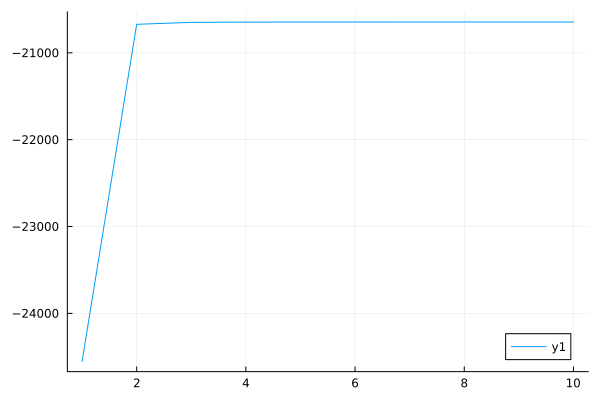

In [23]:
plot(mls)

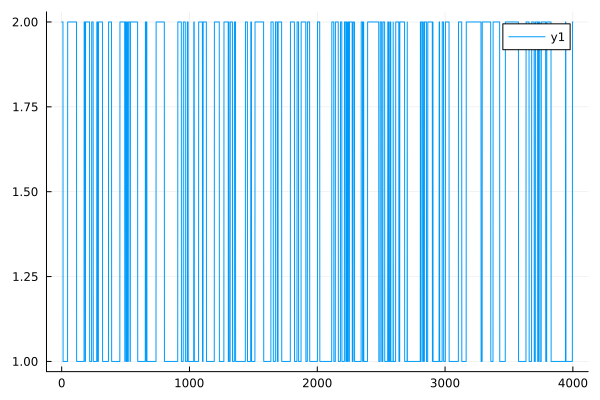

In [24]:
plot(z)

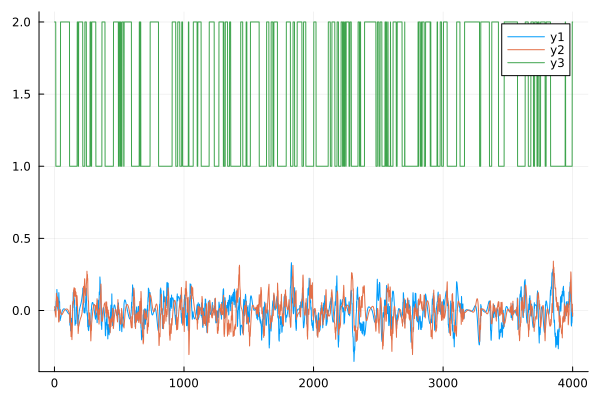

In [25]:
plot(FS[1].x_smooth')
plot!(z)

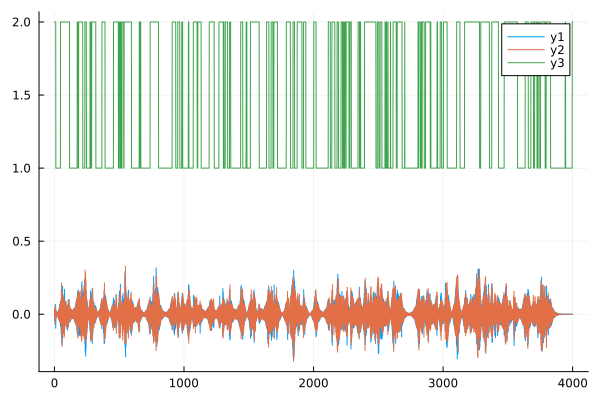

In [26]:
plot(FS[2].x_smooth')
plot!(z)

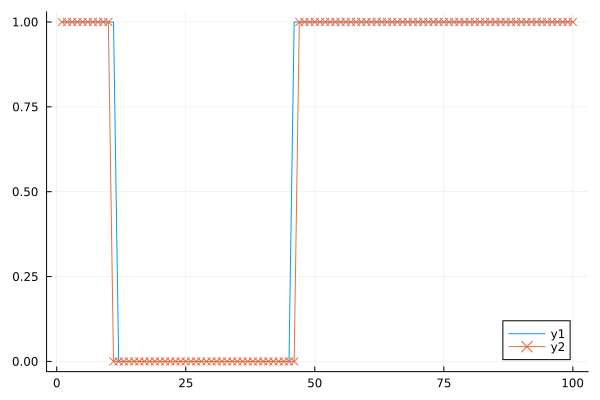

In [27]:
plot(exp.(FB.γ)'[1:100,2])
plot!(z[1:100] .- 1, marker=:x)

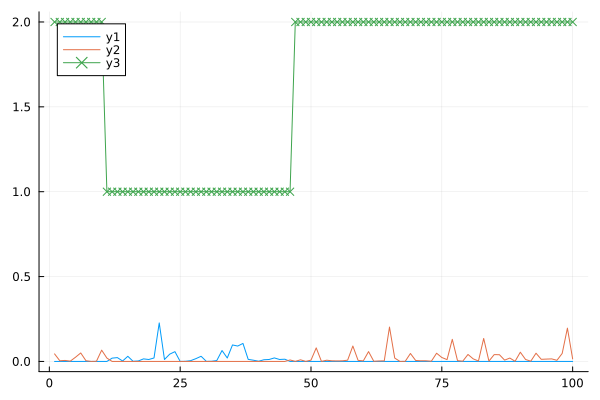

In [28]:
plot(exp.(FB.loglikelihoods[:,1:100])')
plot!(z[1:100], marker=:x)

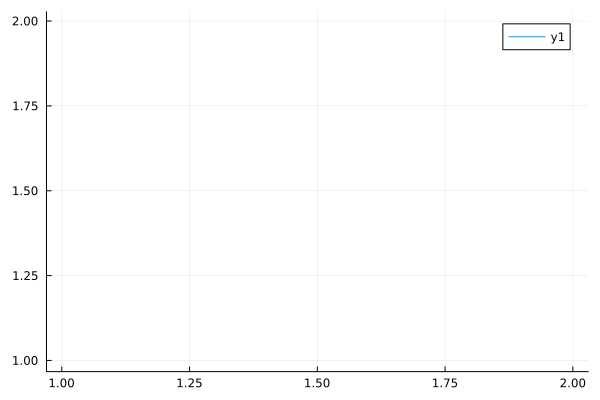

In [18]:
plot(param_diff)